In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib
matplotlib.style.use('fivethirtyeight')

import random
random.seed(9001)

In [2]:
# questions:
# what variables related to fraud
# in which city that incident happens?
# type of cars that 

# Data: https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data

In [3]:
main_df = pd.read_csv('insurance_claims.csv')
main_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
# print unique value for each columns

for col in main_df.columns:
    print(f"{col}: \n{main_df[col].unique()}\n")


months_as_customer: 
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 3

In [6]:
# Change datatype
# policy_bind_date should be date type
# incident_date should be date type
main_df[["policy_bind_date", "incident_date"]] = main_df[["policy_bind_date", "incident_date"]].apply(pd.to_datetime)
#main_df[["insured_zip", "incident_hour_of_the_day", "auto_year"]] = main_df[["insured_zip", "incident_hour_of_the_day", "auto_year"]].astype('string')

main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [7]:
# there is '?' in the categorical variable. change to NaN. 
main_df.replace('?', np.nan, inplace = True)

In [8]:
main_df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
# drop columns with NaN '_c39','collision_type','property_damage','police_report_available'
to_drop = ['_c39','collision_type','property_damage','police_report_available']
main_df.drop(to_drop, inplace = True, axis = 1)

main_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,1,2,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,2,3,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,1,2,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,0,1,6500,1300,650,4550,Accura,RSX,2009,N


## Exploratory Data Analysis

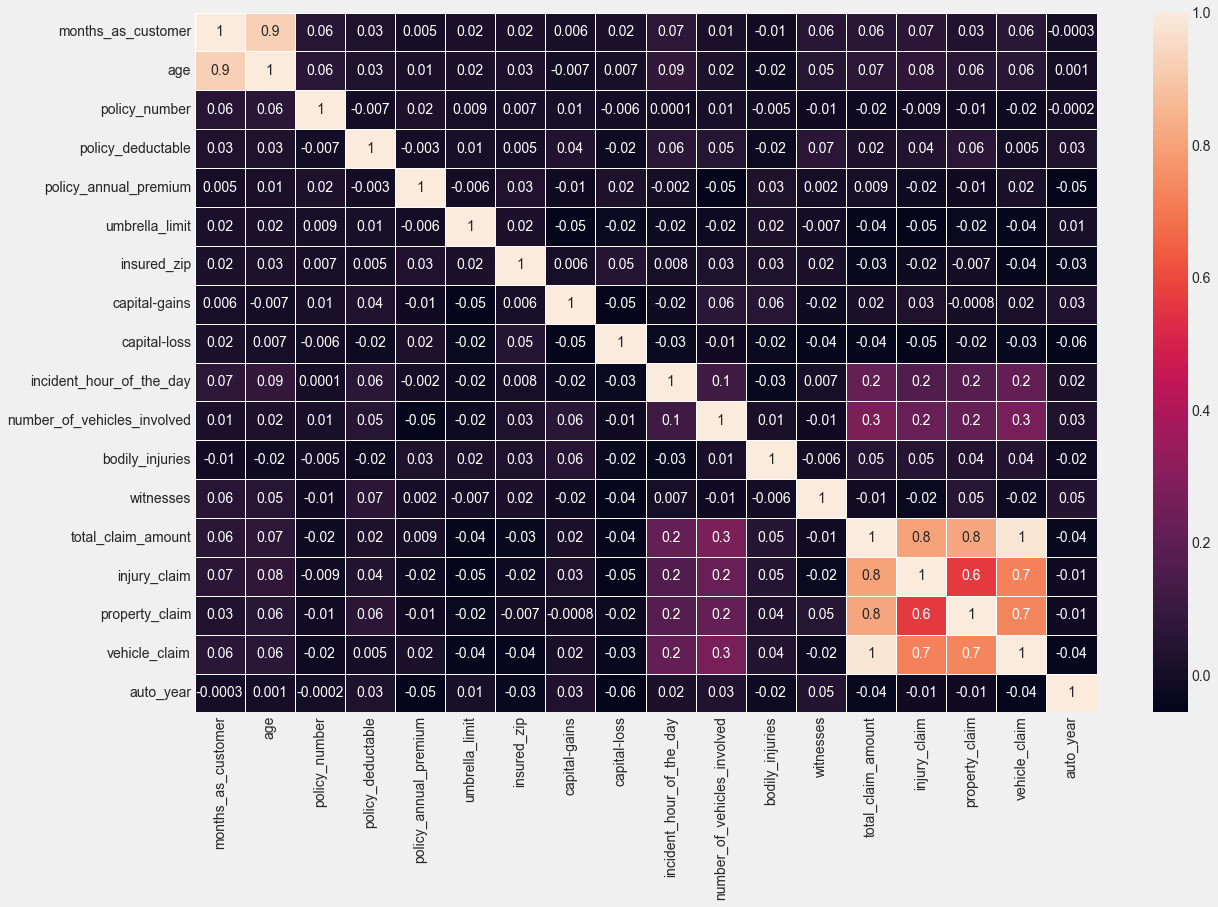

In [10]:
# Heatmap correlation plot for all variables

plt.figure(figsize = (18, 12))

corr = main_df.corr()
#mask = np.triu(np.ones_like(corr, dtype = bool))
# mask = mask,
sns.heatmap(data = corr,  annot = True, fmt = '.1g', linewidth = 1)
plt.show()

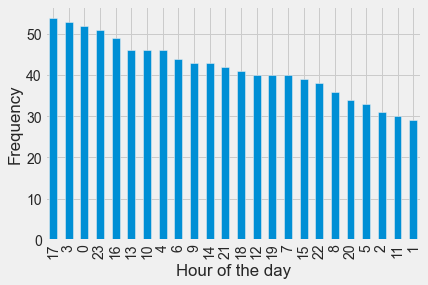

In [11]:

# Bar plot number of incidence per hour
fig, ax = plt.subplots()
#plt.figure(figsize = (18, 12))

main_df['incident_hour_of_the_day'].value_counts().plot(ax=ax, kind='bar', xlabel='Hour of the day', ylabel='Frequency')
plt.show()
# incidences mostly happens at 17.00

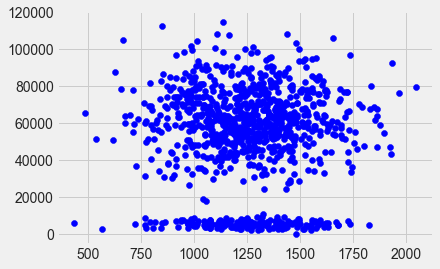

In [12]:
# scatter plot of annual premium vs total claim amount
plt.scatter(x = main_df['policy_annual_premium'], y = main_df['total_claim_amount'], c = 'blue')
plt.show()

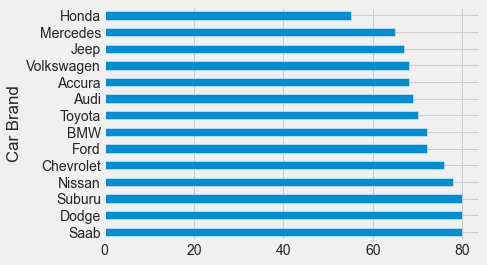

Text(0.5, 0, 'Count')

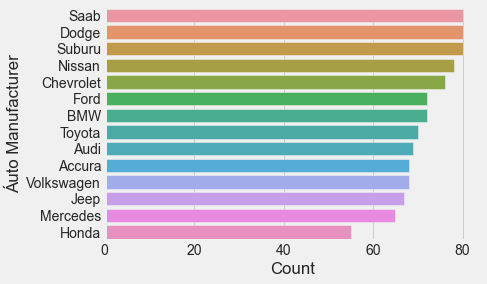

In [14]:
sns.countplot(y='auto_make',data=main_df, order = main_df['auto_make'].value_counts().index)
plt.ylabel('Áuto Manufacturer')
plt.xlabel('Count')

fraud_reported
auto_make  fraud_reported                
Accura     N                         81.0
           Y                         19.0
Audi       N                         70.0
           Y                         30.0
BMW        N                         72.0
           Y                         28.0
Chevrolet  N                         72.0
           Y                         28.0
Dodge      N                         75.0
           Y                         25.0
Ford       N                         69.0
           Y                         31.0
Honda      N                         75.0
           Y                         25.0
Jeep       N                         84.0
           Y                         16.0
Mercedes   N                         66.0
           Y                         34.0
Nissan     N                         82.0
           Y                         18.0
Saab       N                         78.0
           Y                         22.0
Suburu     N                         76.0
           Y                         24.0
Toyota     N                         81.0
           Y                         19.0
Volkswagen N                         72.0
           Y                         28.0

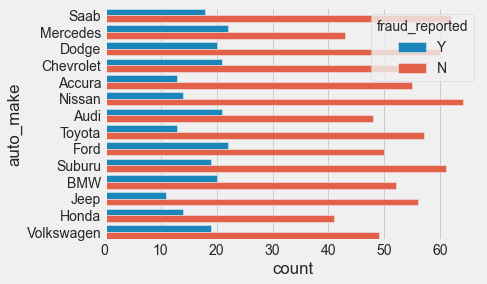

In [15]:
sns.countplot(y='auto_make',hue='fraud_reported',data=main_df)

# by auto_make
fraud_by_automake = main_df.groupby(['auto_make', 'fraud_reported']).agg({'fraud_reported': 'count'})
fraud_by_automake.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum())))
# Audi, Mercedes, ford : fraud >30%



fraud_reported
policy_csl fraud_reported                
100/300    N                         74.0
           Y                         26.0
250/500    N                         74.0
           Y                         26.0
500/1000   N                         78.0
           Y                         22.0

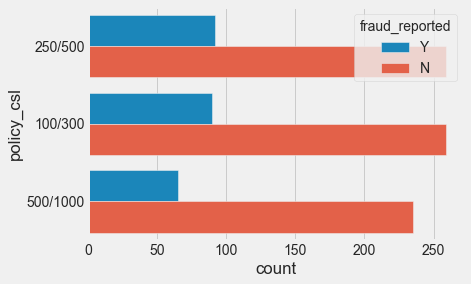

In [16]:
sns.countplot(y='policy_csl',hue='fraud_reported',data=main_df)

# policy_csl 
fraud_by_policy_csl = main_df.groupby(['policy_csl', 'fraud_reported']).agg({'fraud_reported': 'count'})
fraud_by_policy_csl.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum())))
# csl 100/300 and 250/500 : fraud =26%


fraud_reported
insured_sex fraud_reported                
FEMALE      N                         77.0
            Y                         23.0
MALE        N                         74.0
            Y                         26.0

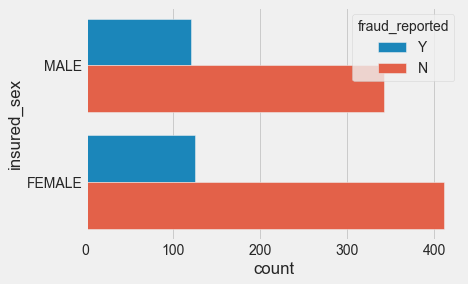

In [17]:
sns.countplot(y='insured_sex',hue='fraud_reported',data=main_df)

# insured_sex 
fraud_by_insured_sex = main_df.groupby(['insured_sex', 'fraud_reported']).agg({'fraud_reported': 'count'})
fraud_by_insured_sex.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum())))
# male (26%) sligtly higher than female (24%) for making fraud

fraud_reported
insured_education_level fraud_reported                
Associate               N                         77.0
                        Y                         23.0
College                 N                         74.0
                        Y                         26.0
High School             N                         78.0
                        Y                         22.0
JD                      N                         74.0
                        Y                         26.0
MD                      N                         74.0
                        Y                         26.0
Masters                 N                         78.0
                        Y                         22.0
PhD                     N                         74.0
                        Y                         26.0

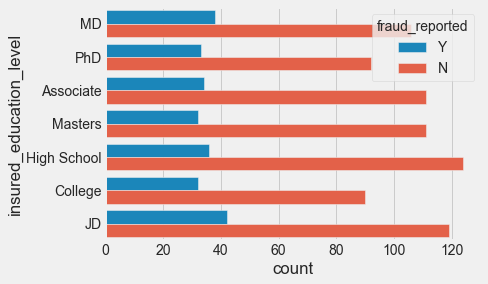

In [18]:
sns.countplot(y='insured_education_level',hue='fraud_reported',data=main_df)

# insured_education_level 
fraud_by_insured_education_level = main_df.groupby(['insured_education_level', 'fraud_reported']).agg({'fraud_reported': 'count'})
fraud_by_insured_education_level.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum())))
# College, JD, MD, PhD fraud = 26% 

fraud_reported
incident_severity fraud_reported                
Major Damage      N                         39.0
                  Y                         61.0
Minor Damage      N                         89.0
                  Y                         11.0
Total Loss        N                         87.0
                  Y                         13.0
Trivial Damage    N                         93.0
                  Y                          7.0

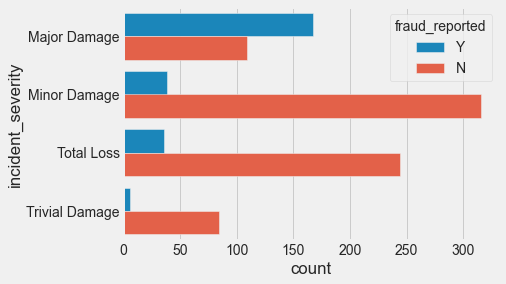

In [19]:
sns.countplot(y='incident_severity',hue='fraud_reported',data=main_df)

# incident_severity 
fraud_by_incident_severity = main_df.groupby(['incident_severity', 'fraud_reported']).agg({'fraud_reported': 'count'})
fraud_by_incident_severity.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum())))
# Major damage 61%

fraud_reported
incident_type            fraud_reported                
Multi-vehicle Collision  N                         73.0
                         Y                         27.0
Parked Car               N                         90.0
                         Y                         10.0
Single Vehicle Collision N                         71.0
                         Y                         29.0
Vehicle Theft            N                         91.0
                         Y                          9.0

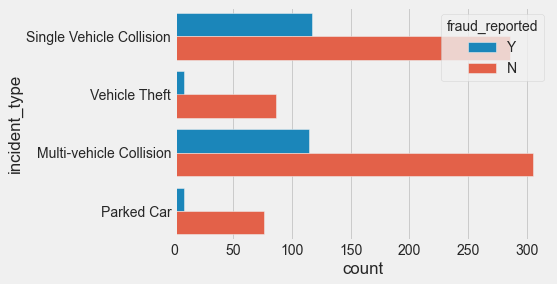

In [20]:
sns.countplot(y='incident_type',hue='fraud_reported',data=main_df)

# incident_type 
fraud_by_incident_type = main_df.groupby(['incident_type', 'fraud_reported']).agg({'fraud_reported': 'count'})
fraud_by_incident_type.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum())))
# Single Vehicle Collision 29%

fraud_reported
insured_hobbies fraud_reported                
base-jumping    N                         73.0
                Y                         27.0
basketball      N                         82.0
                Y                         18.0
board-games     N                         71.0
                Y                         29.0
bungie-jumping  N                         84.0
                Y                         16.0
camping         N                         91.0
                Y                          9.0
chess           N                         17.0
                Y                         83.0
cross-fit       N                         26.0
                Y                         74.0
dancing         N                         88.0
                Y                         12.0
exercise        N                         81.0
                Y                         19.0
golf            N                         89.0
                Y                         11.0
hiking          N                         77.0
                Y                         23.0
kayaking        N                         91.0
                Y                          9.0
movies          N                         84.0
                Y                         16.0
paintball       N                         77.0
                Y                         23.0
polo            N                         72.0
                Y                         28.0
reading         N                         73.0
                Y                         27.0
skydiving       N                         78.0
                Y                         22.0
sleeping        N                         80.0
                Y                         20.0
video-games     N                         80.0
                Y                         20.0
yachting        N                         70.0
                Y                         30.0

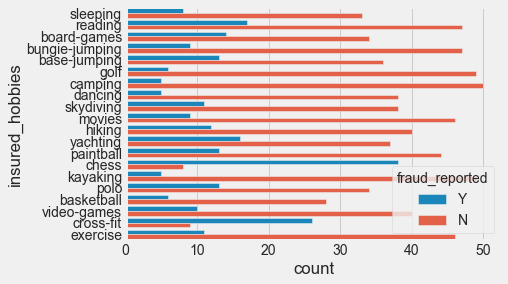

In [21]:
sns.countplot(y='insured_hobbies',hue='fraud_reported',data=main_df)

# insured_hobbies 
fraud_by_insured_hobbies = main_df.groupby(['insured_hobbies', 'fraud_reported']).agg({'fraud_reported': 'count'})
fraud_by_insured_hobbies.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum())))
# Chess 83%, cross-fit 71%

fraud_reported
insured_occupation fraud_reported                
adm-clerical       N                         83.0
                   Y                         17.0
armed-forces       N                         75.0
                   Y                         25.0
craft-repair       N                         70.0
                   Y                         30.0
exec-managerial    N                         63.0
                   Y                         37.0
farming-fishing    N                         70.0
                   Y                         30.0
handlers-cleaners  N                         80.0
                   Y                         20.0
machine-op-inspct  N                         76.0
                   Y                         24.0
other-service      N                         83.0
                   Y                         17.0
priv-house-serv    N                         83.0
                   Y                         17.0
prof-specialty     N                         79.0
                   Y                         21.0
protective-serv    N                         78.0
                   Y                         22.0
sales              N                         72.0
                   Y                         28.0
tech-support       N                         72.0
                   Y                         28.0
transport-moving   N                         71.0
                   Y                         29.0

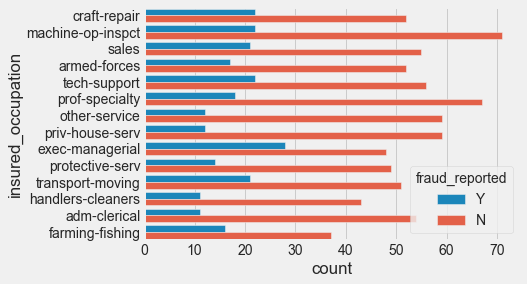

In [22]:
sns.countplot(y='insured_occupation',hue='fraud_reported',data=main_df)

# insured_hobbies 
fraud_by_insured_occupation = main_df.groupby(['insured_occupation', 'fraud_reported']).agg({'fraud_reported': 'count'})
fraud_by_insured_occupation.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum())))
# exec-managerial 37%

In [23]:
# Percentage fraud for each categorical variable

# insured_education_level 

# incident_severity 

# incident_type 

# insured_hobbies 

# insured_occupation



In [24]:
main_df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [25]:
# extracting the numerical columns

num_df = main_df.select_dtypes(include = ['int64', 'float64'])

In [26]:
# Drop unrelated variable for predictions
to_drop_num = ['policy_number','insured_zip','auto_year', 'age', 'total_claim_amount']

num_df.drop(to_drop_num, inplace = True, axis = 1)

num_df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,1406.91,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,1300,650,4550


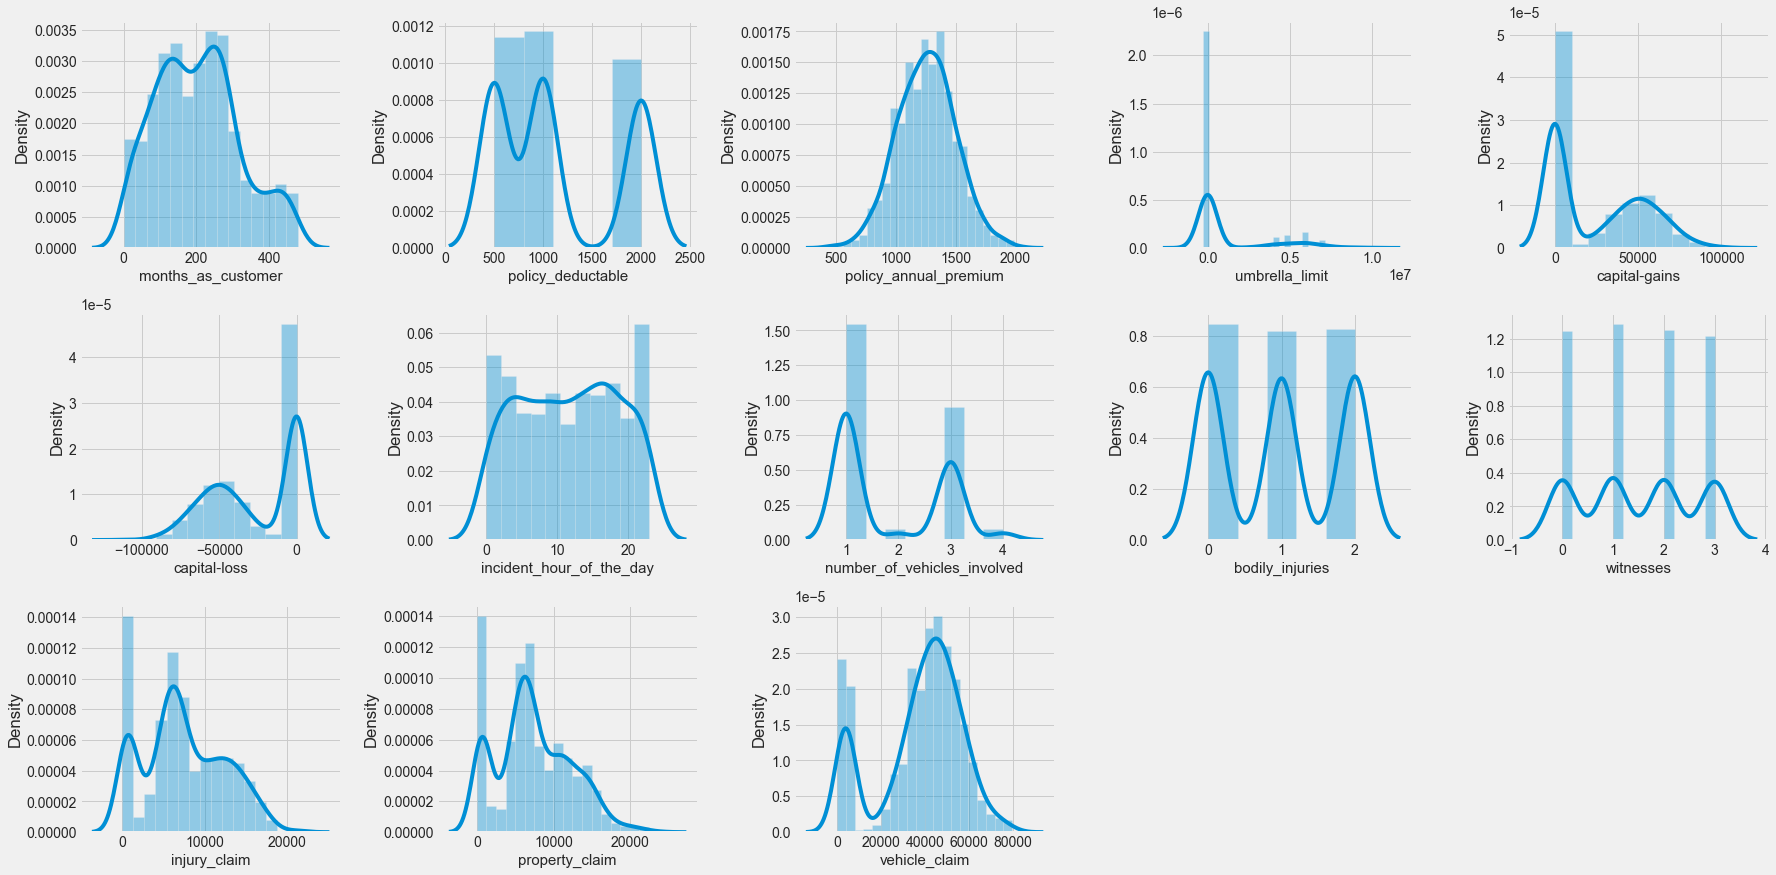

In [27]:
# Histogram of Continuous variable
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in num_df.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(num_df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [28]:
# extracting categorical columns

cat_df = main_df.select_dtypes(include = ['object'])

for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")
    
to_drop_cat = ['policy_state', 'incident_location','insured_hobbies','insured_occupation','insured_relationship',
           'incident_state','incident_city','auto_make','auto_model']

cat_df.drop(to_drop_cat, inplace = True, axis = 1)



policy_state: 
['OH' 'IN' 'IL']

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_hobbies: 
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

autho

In [29]:
# separating the feature and target columns

# outcome
y = cat_df['fraud_reported']

# features
cat_df.drop('fraud_reported', inplace = True ,axis = 1)


In [30]:
# categorical variable to dummies

cat_df = pd.get_dummies(cat_df, drop_first = True)


In [31]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)

In [32]:
# now we have outcome y and features X
X.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,1000,1406.91,0,53300,0,5,1,1,2,...,0,1,0,0,0,0,0,0,0,1
1,228,2000,1197.22,5000000,0,0,8,1,0,0,...,0,0,1,1,0,0,0,0,0,1
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,...,0,0,0,1,0,0,0,0,0,1
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,...,0,1,0,0,0,0,0,0,0,1
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,...,0,0,1,1,0,0,0,1,0,0


# Modeling

In [33]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [34]:
# Support Vector Classifier (SVC)
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

# accuracy_score

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")


Training accuracy of Support Vector Classifier is : 0.7453333333333333
Test accuracy of Support Vector Classifier is : 0.776


In [35]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# accuracy_score

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")



Training accuracy of KNN is : 0.7453333333333333
Test accuracy of KNN is : 0.776


In [36]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 10, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

# best estimator 

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")



Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.676
Fitting 10 folds for each of 512 candidates, totalling 5120 fits
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.8053333333333332
Training accuracy of Decision Tree is : 0.8053333333333333
Test accuracy of Decision Tree is : 0.828


In [37]:
dtc.feature_importances_

array([0.        , 0.02192715, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02144409, 0.37900473, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01110607, 0.        , 0.        , 0.        , 0.        ,
       0.21582901, 0.35068895, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [38]:
feat_importances = pd.DataFrame(dtc.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)


Text(0, 0.5, 'Features')

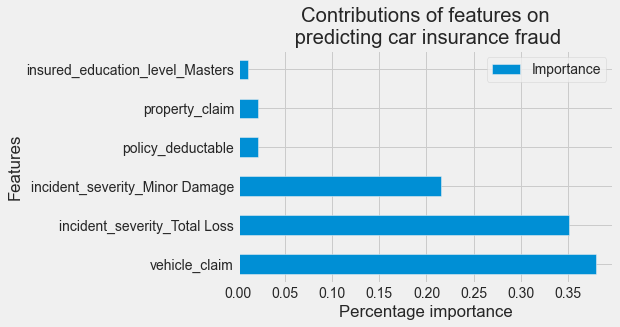

In [39]:
import matplotlib
matplotlib.style.use('fivethirtyeight')

feat_imp = feat_importances[0:6]

feat_imp.plot(kind="barh")

plt.title("Contributions of features on\n predicting car insurance fraud")
plt.xlabel("Percentage importance")
plt.ylabel("Features")

In [40]:
# Random forest classifier

from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")


Training accuracy of Random Forest is : 0.9786666666666667
Test accuracy of Random Forest is : 0.784


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training accuracy of Ada Boost is : 0.8053333333333333
Test accuracy of Ada Boost is : 0.828


In [42]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")


Training Accuracy of Gradient Boosting Classifier is 0.9346666666666666
Test Accuracy of Gradient Boosting Classifier is 0.808 



In [43]:
# Stocastic Gradient boosting

sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")



Training Accuracy of Stochastic Gradient Boosting is 0.9253333333333333
Test Accuracy of Stochastic Gradient Boosting is 0.796 



591    Y
726    N
254    Y
120    N
996    N
Name: fraud_reported, dtype: object

In [46]:
# Model Comparison

models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'SGB' ], # ,'XgBoost' , ,'Ada Boost'
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc, gb_acc, sgb_acc] #, xgb_test_acc, ada_test_acc,
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Decision Tree,0.828
4,Gradient Boost,0.808
5,SGB,0.796
3,Random Forest,0.784
0,SVC,0.776
1,KNN,0.776
